# import modules

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data

In [6]:
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/2_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

print("test_unknown_data shape:", test_unknown_data.shape)
print("test_unknown_data shape:", test_unknown_data.columns)


test_unknown_data shape: (5728, 46)
test_unknown_data shape: Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')


In [7]:
knn_clf_26 = KNeighborsClassifier(n_neighbors=26)
knn_clf_20 = KNeighborsClassifier(n_neighbors=20)
knn_clf_15 = KNeighborsClassifier(n_neighbors=15)
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn_list = []
knn_list.append(knn_clf_26)
knn_list.append(knn_clf_20)
knn_list.append(knn_clf_15)
knn_list.append(knn_clf_10)
knn_list.append(knn_clf_5)

# KNN WORKING CODE BELOW
<
<style>
td,th {
  font-size: 15px
}
</style>

In [9]:
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming test_unknown_data is your test data
# Drop the 'label' column from test_unknown_data
#test_unknown_data = test_unknown_data.drop('label', axis=1)

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit and transform the label column in the test data
test_unknown_label_encoded = label_encoder.fit_transform(test_unknown_label['label'])
y_encoded = test_unknown_label_encoded

# Add the encoded labels to the test data
test_unknown_data['encoded_label'] = test_unknown_label_encoded

# Create a dictionary to map encoded labels back to original labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)


# Train the kNN classifier on your training data
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Assuming your_training_data and your_training_labels are your original training data and labels
knn_clf.fit(test_unknown_data, test_unknown_label.values.ravel())  

# Make predictions on the test data
predictions = knn_clf.predict(np.array(test_unknown_data))

accuracy = accuracy_score(test_unknown_label_encoded, predictions)
print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')

# Loop through each kNN classifier in knn_list
for knn_clf in knn_list:
    # Train the kNN classifier on your training data
    knn_clf.fit(test_unknown_data, test_unknown_label.values.ravel()) 

    # Make predictions on the test data
    predictions = knn_clf.predict(np.array(test_unknown_data))

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(test_unknown_label.values.ravel(), predictions)
    
    # Print the accuracy for each kNN classifier
    print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')


Class Mapping: {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DNS_Spoofing': 4, 'DictionaryBruteForce': 5, 'DoS': 6, 'MITM-ArpSpoofing': 7, 'Recon': 8, 'SqlInjection': 9, 'VulnerabilityScan': 10, 'XSS': 11}
Accuracy for kNN with 5 neighbors: 0.0
Accuracy for kNN with 26 neighbors: 0.8854748603351955
Accuracy for kNN with 20 neighbors: 0.8859986033519553
Accuracy for kNN with 15 neighbors: 0.8880935754189944
Accuracy for kNN with 10 neighbors: 0.8915851955307262
Accuracy for kNN with 5 neighbors: 0.8952513966480447


Class Mapping: {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DNS_Spoofing': 4, 'DictionaryBruteForce': 5, 'DoS': 6, 'MITM-ArpSpoofing': 7, 'Recon': 8, 'SqlInjection': 9, 'VulnerabilityScan': 10, 'XSS': 11}


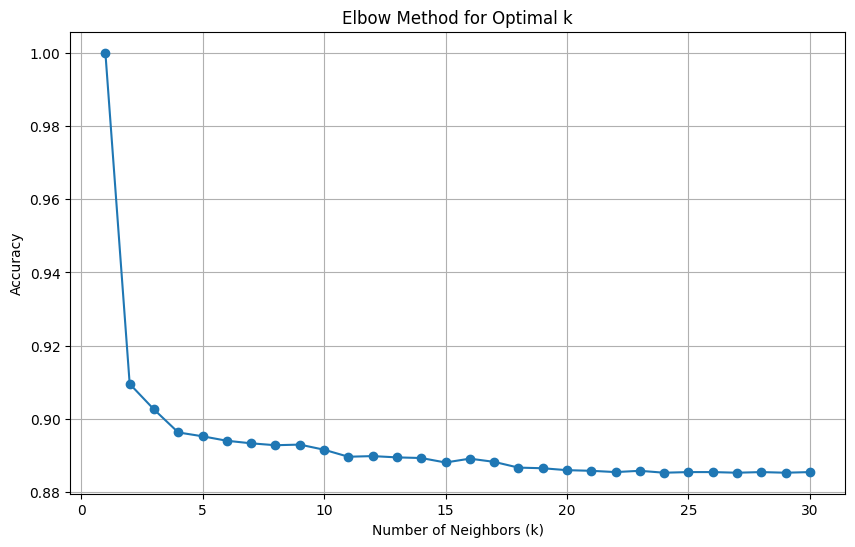

In [10]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming test_unknown_data is your test data
# Drop the 'label' column from test_unknown_data
# test_unknown_data = test_unknown_data.drop('label', axis=1)

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit and transform the label column in the test data
test_unknown_label_encoded = label_encoder.fit_transform(test_unknown_label['label'])

# Add the encoded labels to the test data
test_unknown_data['encoded_label'] = test_unknown_label_encoded

# Create a dictionary to map encoded labels back to original labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

# Define a range of values for k (number of neighbors)
k_values = np.arange(1, 31)  # Adjust the range as needed

# Initialize an empty list to store accuracy values for each k
accuracy_values = []

# Loop through each k value
for k in k_values:
    # Create and train the kNN classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(test_unknown_data, test_unknown_label.values.ravel())

    # Make predictions on the test data
    predictions = knn_clf.predict(np.array(test_unknown_data))

    # Evaluate the performance of the classifier and store the accuracy
    accuracy = accuracy_score(test_unknown_label.values.ravel(), predictions)
    accuracy_values.append(accuracy)

# Plot the accuracy values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# MY PLOT FOR KNN

<style>
h1 {
    font-size: 24px;
    color: blue;
}
</style>

In [12]:
class_mapping

{'Backdoor_Malware': 0,
 'BenignTraffic': 1,
 'BrowserHijacking': 2,
 'CommandInjection': 3,
 'DNS_Spoofing': 4,
 'DictionaryBruteForce': 5,
 'DoS': 6,
 'MITM-ArpSpoofing': 7,
 'Recon': 8,
 'SqlInjection': 9,
 'VulnerabilityScan': 10,
 'XSS': 11}

In [15]:
flipped_dict = dict((v, k) for k, v in class_mapping.items())

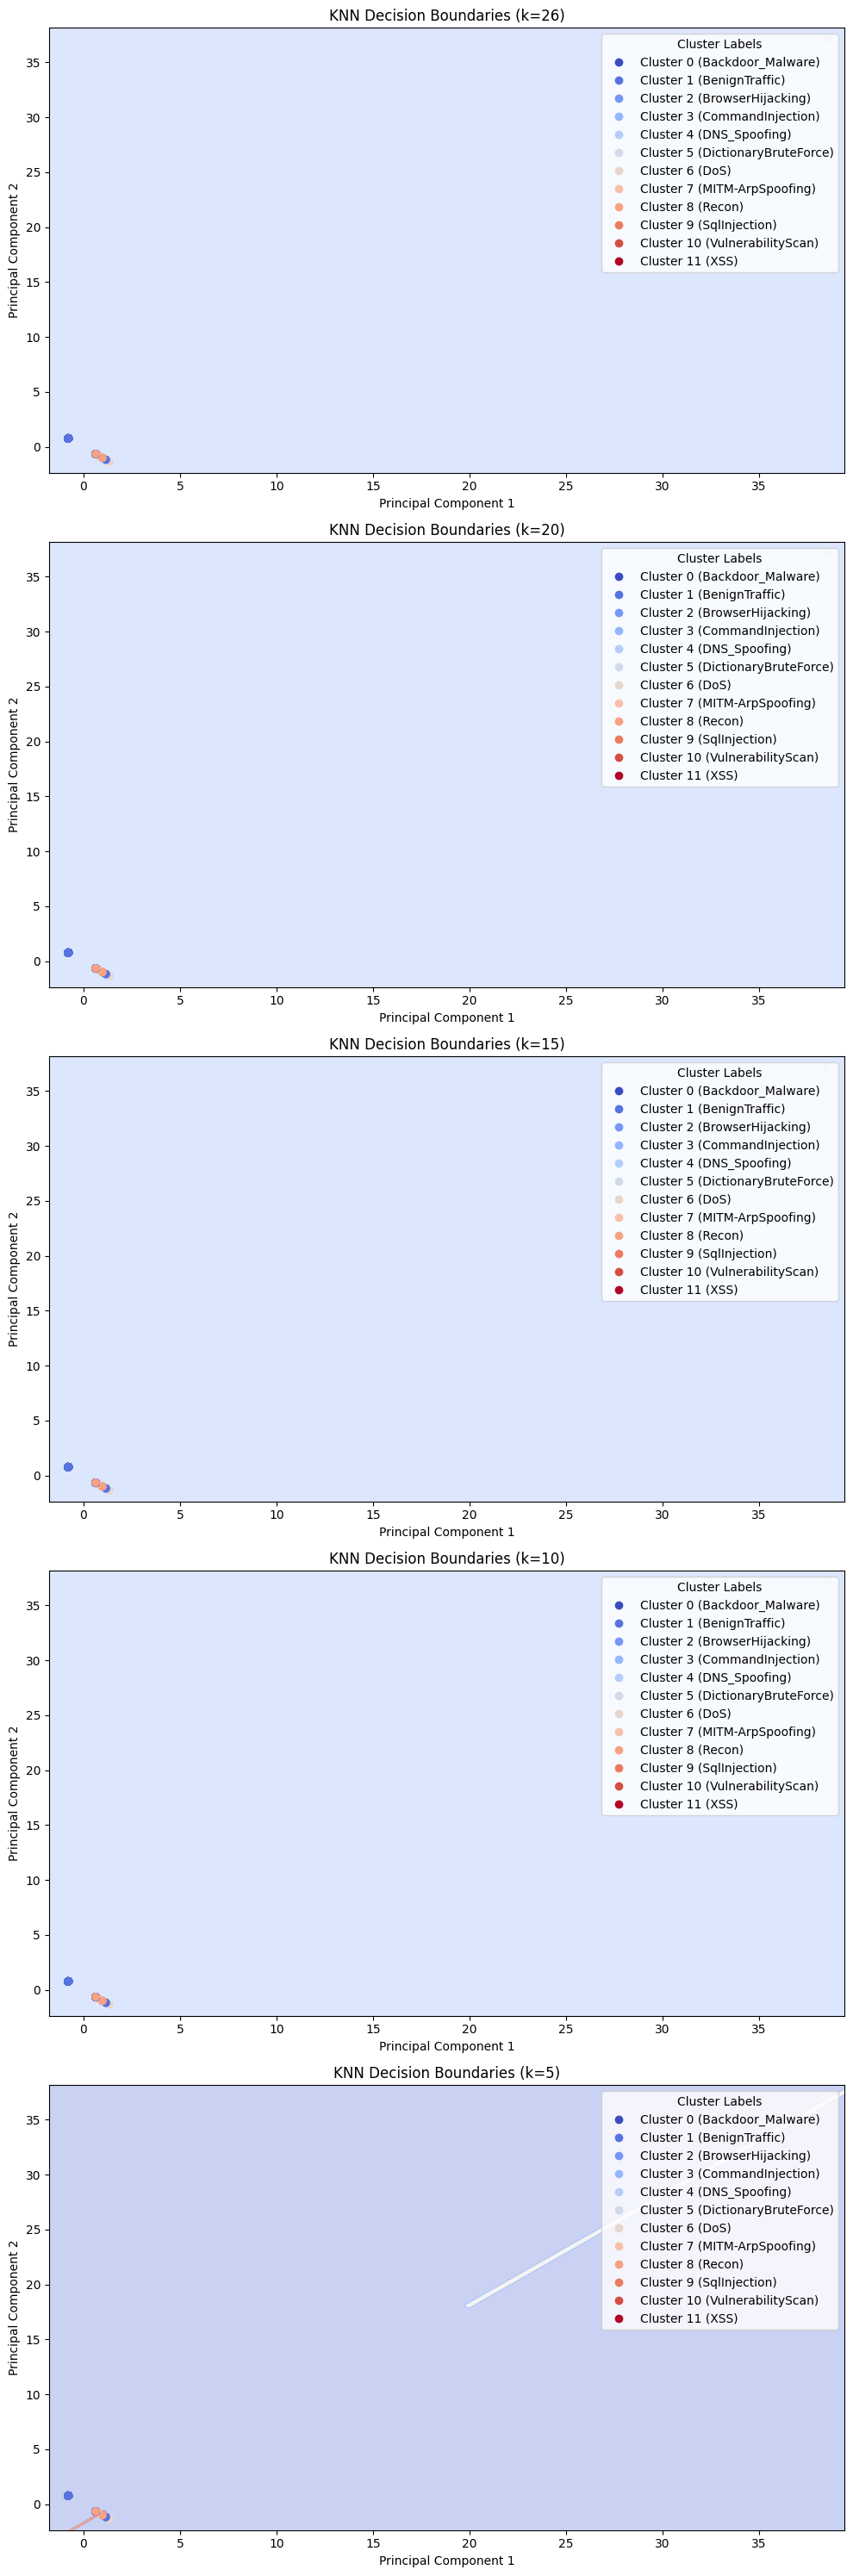

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Load the datasets
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/2_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

X = test_unknown_data
y = test_unknown_label

# Apply label encoding to the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a dictionary to map encoded labels to original labels
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}

# Specify the number of features to select
k_best = 2

# Apply SelectKBest with ANOVA F-statistic as the scoring function
selector = SelectKBest(f_classif, k=k_best)
selected_data = selector.fit_transform(X, y_encoded)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
scaled_data = StandardScaler().fit_transform(selected_data)
reduced_data = pca.fit_transform(scaled_data)

# Set up k-NN classifiers with different k values
knn_list = [KNeighborsClassifier(n_neighbors=k) for k in [26, 20, 15, 10, 5]]

def plot_decision_boundary(knn, X, y, title, ax):
    h = 0.1  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain predictions for each point in the meshgrid
    Z_encoded = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z_encoded.reshape(xx.shape)
    
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points using encoded labels
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=plt.cm.coolwarm)

    # Find and annotate cluster centers with actual labels
    cluster_centers = knn._fit_X  # Get the cluster centers from the fitted k-NN model
    cluster_labels = knn.predict(cluster_centers)
    
    # Add a legend with color-label mapping
    legend_labels = [f'Cluster {i} ({label_mapping[label]})' for i, label in enumerate(flipped_dict)]
    ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster Labels', loc='upper right')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Set up subplots
fig, axes = plt.subplots(len(knn_list), 1, figsize=(10, 30))

# Plot decision boundaries for each k-NN classifier
for i, (knn, k) in enumerate(zip(knn_list, [26, 20, 15, 10, 5])):
    knn.fit(reduced_data, y_encoded)
    plot_decision_boundary(knn, reduced_data, y_encoded, f'KNN Decision Boundaries (k={k})', axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
